In [34]:
### Easiest binary classification algorithm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# visual your data
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
dataset = pd.read_csv("data (1) (dataset for logistic).csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/Users/andreaprotti/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


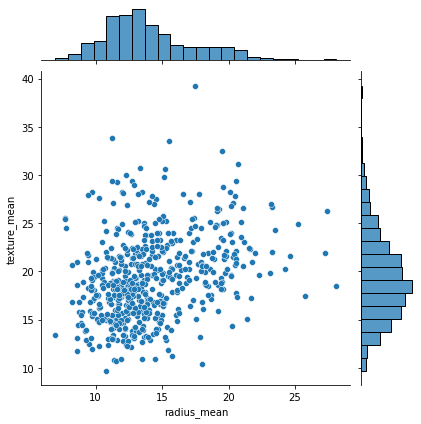

In [14]:
sns.jointplot('radius_mean', 'texture_mean', data=dataset)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

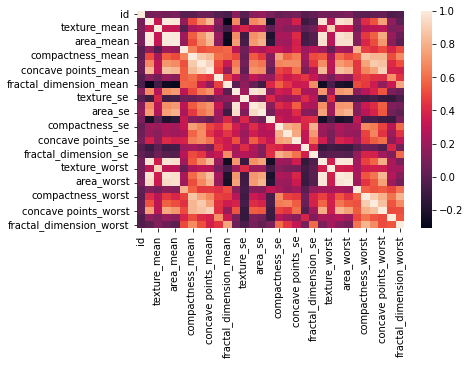

In [15]:
### Heat map
sns.heatmap(dataset.corr())

### This looks how many empty spaces are in the table.
dataset.isnull().sum()  

In [ ]:
### If there are empty spaces, run these comands

dataset1=dataset[dataset.columns[2:]]   #adjust the number of columns

for i in dataset1.columns :
    dataset1[i] = dataset1[i].fillna(int(dataset1[i].mean()))
    #print(dataset[i])

dataset1.isnull().sum()

In [27]:
## We can consider only few features of the dataset for prediction
#X = dataset[['radius_worst', 'texture_worst' , 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst']]
#y = dataset['diagnosis']
#X.head()

# Select X and y
X = dataset1.iloc[:, 2:].values    
y = dataset.iloc[:, 1:2].values

# Transforming text to an array of number
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
#print(y)

In [30]:
### Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = LogisticRegression()
model.fit(X_train, y_train)   # predictions

y_pred = model.predict(X_test)
#print(y_pred)
#print(y_test)

/Users/andreaprotti/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print('Accuracy is =', accuracy_score(y_test, y_pred)*100)
# Confusion matrix
print('\n Confusion matrix is = \n', confusion_matrix(y_test, y_pred))
# Confusion matrix metrics
print('\n Confusion matrix metrix is = \n',classification_report(y_test, y_pred))

Accuracy is = 94.73684210526315

 Confusion matrix is = 
 [[98  4]
 [ 5 64]]

 Confusion matrix metrix is = 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       102
           1       0.94      0.93      0.93        69

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

